In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

In [2]:
df = pd.read_csv("ebay_data.csv")

In [3]:
df = df.drop(columns = ["Unnamed: 0"])

In [4]:
bidding_data = df[(df.price_usd.isnull())]

In [5]:
df = df[(df.price_usd.notnull())]

In [6]:
bidding_data.head(1)

,Name,Links,condition,price_usd,item_specs
0,Shop on eBay,https://ebay.com/itm/123456?amdata=enc%3AAQAHA...,NaN,NaN,NaN


In [7]:
df = df.reset_index().drop(["index"], axis=1)

In [8]:
import ast

df['item_specs'] = df['item_specs'].apply(lambda x: ast.literal_eval(x))

In [9]:
datatypes = df.dtypes
df.dtypes

Name           object
Links          object
condition      object
price_usd     float64
item_specs     object
dtype: object

In [10]:
temp = []
for i in df.item_specs:
    temp.append(list(i.keys()))

In [11]:
all_specs = list(set.union(*map(set, temp)))

In [12]:
list_of_item_specs = df['item_specs'].to_list()

In [13]:
temp_df = pd.DataFrame(list_of_item_specs)

In [14]:
df_base = pd.concat([df, temp_df], axis=1, join='inner')

In [15]:
df_base.Name.count()

3079

In [16]:
df_working = df_base

In [17]:
df_working = df_working.drop([' Condition', 'item_specs'], axis=1)

In [18]:
high_count_col = []

for i in df_working.columns:
    if df_working[i].count() > 1500:
        high_count_col.append(i)

In [19]:
len(high_count_col)

21

In [20]:
high_count_col

['Name',
 'Links',
 'condition',
 'price_usd',
 ' Model',
 ' Internet Connectivity',
 ' Type',
 ' MPN',
 ' Storage Capacity',
 ' RAM Size',
 ' Brand',
 ' Screen Size',
 ' Series',
 ' Network',
 ' UPC',
 ' Processor',
 ' Color',
 ' Maximum Resolution',
 ' Connectivity',
 ' Operating System',
 ' Features']

In [21]:
len(df_working)

3079

In [22]:
df2 = df_working[high_count_col]

In [23]:
df2 = df2.drop(['Links'], axis=1)

In [24]:
df2 = df2.drop_duplicates()

In [25]:
len(df2)

2894

In [26]:
df2.columns

Index(['Name', 'condition', 'price_usd', ' Model', ' Internet Connectivity',
       ' Type', ' MPN', ' Storage Capacity', ' RAM Size', ' Brand',
       ' Screen Size', ' Series', ' Network', ' UPC', ' Processor', ' Color',
       ' Maximum Resolution', ' Connectivity', ' Operating System',
       ' Features'],
      dtype='object')

In [27]:
df2['condition'].value_counts()

Used                        1789
New                          283
Open box                     266
For parts or not working     260
Seller refurbished           147
Very Good - Refurbished       63
Excellent - Refurbished       48
Good - Refurbished            37
Certified - Refurbished        1
Name: condition, dtype: int64

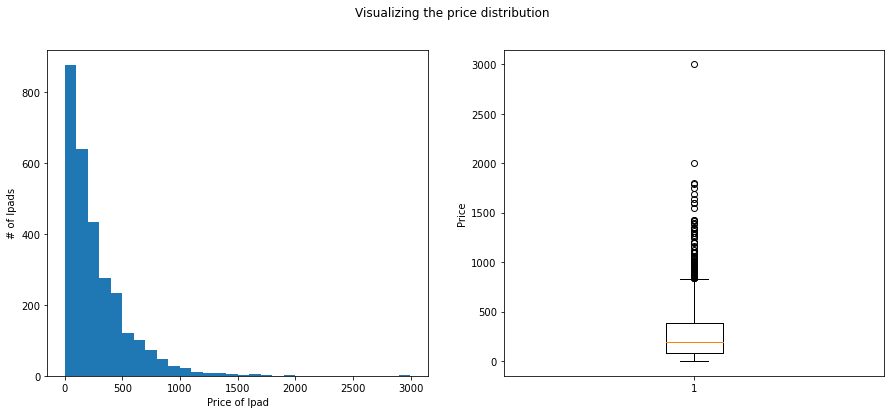

In [28]:
#fig, axs = plt.subplots(2)
fig, axs = plt.subplots(1,2,figsize=(15, 6))
fig.suptitle('Visualizing the price distribution')
axs[0].hist(df2.price_usd, bins=30)
axs[0].set_xlabel('Price of Ipad')
axs[0].set_ylabel('# of Ipads')
axs[1].boxplot(df2.price_usd)
axs[1].set_ylabel('Price')

plt.show()

In [29]:
df2[(df2.price_usd > 1500)]
#removing the index 1538 - from the name, the row doesn't seem correct

df2 = df2.drop(1538)

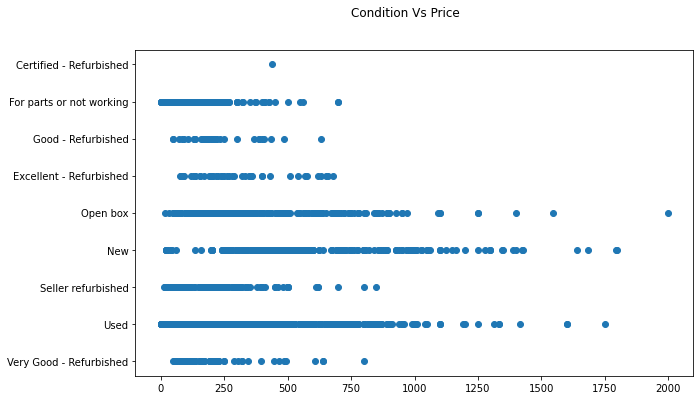

In [30]:
fig = plt.figure(figsize=(10, 6))
ax1 = fig.add_subplot(111)
fig.suptitle('Condition Vs Price')
ax1.scatter(df2.price_usd,df2.condition, color='tab:blue', label='MEN')
plt.show()

In [31]:
df2["condition"].replace({"Seller refurbished": "Refurbished", "Very Good - Refurbished": "Refurbished", 
                          "Excellent - Refurbished" : "Refurbished", "Good - Refurbished" : "Refurbished", 
                              "Certified - Refurbished" : "Refurbished", 
                                "For parts or not working" : "Not working"}, inplace=True)

In [32]:
df2['condition'].value_counts()

Used           1788
Refurbished     296
New             283
Open box        266
Not working     260
Name: condition, dtype: int64

In [33]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

<ipython-input-33-1390d13c0cdd>:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [34]:
df2[['Name',' Model']].head(5)

,Name,Model
0,Apple iPad Mini 1st Gen - 16GB 32GB 64GB - Wi-Fi 7.9in - Very Good,Apple iPad mini (1st Generation)
1,"Apple iPad Air - 9.7-inch, Space Gray, 32GB, Wi-Fi Only, Exclusive Bundle Deal",Apple iPad Air (1st Generation)
2,"Apple iPad Pro 12.9"" 1st Gen 128GB WiFi + Cellular UNLOCKED ( VERY GGOD)",Apple iPad Pro (1st Generation)
3,Apple iPad 2nd 3rd 4th Generation 16GB 32GB 64GB 128GB PICK:GB - Color *Grade B*,NaN
4,"2021 Apple 10.2"" iPad 9th Gen (Wi-Fi, 64GB) Space Gray_Latest Model _New Sealed",Apple iPad (9th Generation)


In [35]:
def model_gen(text,pattern):
    try:
        for match in re.finditer(pattern.lower(), text.lower()):
            s = match.start() - 4
            e = match.end()
            sub_text = text[s:e]
            p = '[0-9]'
            k = re.search(p, sub_text)
            i = k.start()
            j = k.end()
            return(int(sub_text[i:j]))
    except:
        return(None)

In [36]:
text = "Apple iPad Mini 1st Gen - 16GB 32GB 64GB - Wi-Fi 7.9in - Very Good"

model_gen(text,"Gen")

1

In [37]:
for i in df2['Name'].head(5):
    print(i,model_gen(i,"Gen"))

Apple iPad Mini 1st Gen - 16GB 32GB 64GB - Wi-Fi 7.9in - Very Good 1
Apple iPad Air - 9.7-inch, Space Gray, 32GB, Wi-Fi Only, Exclusive Bundle Deal None
Apple iPad Pro 12.9" 1st Gen 128GB WiFi + Cellular UNLOCKED ( VERY GGOD) 1
Apple iPad 2nd 3rd 4th Generation 16GB 32GB 64GB 128GB PICK:GB - Color *Grade B* 4
2021 Apple 10.2" iPad 9th Gen (Wi-Fi, 64GB) Space Gray_Latest Model _New Sealed  9


In [38]:
df2['model_generation'] = df2['Name'].apply(lambda x: model_gen(x,"Gen"))
df2['model_gen'] = df2[' Model'].apply(lambda x: model_gen(x,"Gen"))

In [39]:
df2['model_generation'] = np.where(df2['model_generation'].isnull(), df2['model_gen'], df2['model_generation'])

In [40]:
df2['model_generation'].isnull().sum()

686

In [41]:
df2 = df2.drop(columns = ["model_gen"])

In [42]:
df2.model_generation.value_counts()

1.0    625
4.0    336
3.0    292
5.0    256
2.0    241
6.0    169
9.0    102
8.0    97 
7.0    89 
Name: model_generation, dtype: int64

In [43]:
text = "Apple iPad Mini 1st Gen - 16GB 32GB 64GB - Wi-Fi 7.9in - Very Good"
pattern = "Mini|Air|Pro"
for match in re.finditer(pattern.lower(), text.lower()):
    s = match.start()
    e = match.end()
    sub_text = text[s:e]
    print(sub_text) 

Mini


In [44]:
def model_type(text,pattern):
    try:
        for match in re.finditer(pattern.lower(), text.lower()):
            return(text[match.start():match.end()].lower())
    except:
        return(None)

In [45]:
for i in df2['Name'].head(5):
    print(i,model_type(i,"Mini|Air|Pro"))

Apple iPad Mini 1st Gen - 16GB 32GB 64GB - Wi-Fi 7.9in - Very Good mini
Apple iPad Air - 9.7-inch, Space Gray, 32GB, Wi-Fi Only, Exclusive Bundle Deal air
Apple iPad Pro 12.9" 1st Gen 128GB WiFi + Cellular UNLOCKED ( VERY GGOD) pro
Apple iPad 2nd 3rd 4th Generation 16GB 32GB 64GB 128GB PICK:GB - Color *Grade B* None
2021 Apple 10.2" iPad 9th Gen (Wi-Fi, 64GB) Space Gray_Latest Model _New Sealed  None


In [46]:
df2['model_type'] = df2['Name'].apply(lambda x: model_type(x,"Mini|Air|Pro"))
df2['model_ty'] = df2[' Model'].apply(lambda x: model_type(x,"Mini|Air|Pro"))

In [47]:
df2['model_type'] = np.where(df2['model_type'].isnull(), df2['model_ty'], df2['model_type'])

In [48]:
df2['model_type'].isnull().sum()

929

In [49]:
df2['model_type'].value_counts()

pro     843
air     576
mini    545
Name: model_type, dtype: int64

In [50]:
df2[['Name',' Model','model_generation','model_type']].tail(10)

,Name,Model,model_generation,model_type
3069,"Apple iPad Pro 4th Gen. 256GB, Wi-Fi, 12.9 in - Space Gray",Apple iPad Pro (4th Generation),4.0,pro
3070,"Apple iPad 5th Gen. 32GB, Wi-Fi + Cellular (AT&T), 9.7in - Silver",Apple iPad (5th Generation),5.0,None
3071,"Black Apple 9.7"" iPad 4th Gen 16GB Wi-Fi Tablet A1458 Needs Reset",Apple iPad (4th Generation),4.0,None
3072,"NEW Apple iPad Pro 2nd Gen. 256GB, Wi-Fi, 11 in - Space Gray MXDC2LL/A Fast Ship",Apple iPad Pro (2nd Generation),2.0,pro
3073,"Apple iPad mini 4 128GB, Wi-Fi, 7.9in - Gold",Apple iPad mini 4,NaN,mini
3074,"Apple iPad 7th Gen. 128GB, Wi-Fi BT 4G LTE 10.2 in - Space Gray unlocked",Apple iPad (7th Generation),7.0,None
3075,"NEW-SEALED Apple iPad 8th Gen. 32GB, Wi-Fi, 10.2 in - Space Gray Model #A2270",Apple iPad (8th Generation),8.0,None
3076,"Apple iPad Pro 32GB, Wi-Fi, 9.7in - Space Gray - GOOD COND (R-D)",Apple iPad Pro (1st Generation),1.0,pro
3077,Apple iPad Air 2 - 32GB - Wi-Fi Only - All Colors,Apple iPad Air 2,NaN,air
3078,Apple iPad Air 2 - 64GB - All Colors - WIFI ONLY,Apple iPad Air 2,NaN,air


In [51]:
df2 = df2.drop(columns = ["model_ty"," Model"])

In [52]:
def extract_ic(x):
    try:
        return(x.split(",")[0])
    except:
        return(None)

In [53]:
df2['internet_connectivity'] = df2[' Internet Connectivity'].apply(lambda x: extract_ic(x))

In [54]:
df2 = df2.drop(columns = [" Internet Connectivity"])

In [55]:
df2['internet_connectivity'].value_counts()

Wi-Fi                             2061
Wi-Fi + 4G                        581 
Wi-Fi + 5G                        71  
Wi-Fi + 3G                        33  
N\A                               12  
WiFi                              11  
Not Available                     11  
Not Applicable                    10  
Wi-Fi + Cellular                  10  
Wi-Fi/Cellular                    9   
WiFi + Cellular                   7   
Select from drop-down menu        5   
Wi-Fi + 4G Cellular               5   
Does not apply                    4   
N/A                               4   
Wifi + Cellular                   3   
802.11ac Wi-Fi | Bluetooth 4.4    3   
Wi-Fi or Cellular                 3   
unlocked                          3   
Cellular                          2   
WIFI                              2   
Without Contract                  2   
Does Not Apply                    2   
WiFi only                         2   
Custom Value                      2   
WiFi+Cellular            

In [56]:
df2["internet_connectivity"].replace(dict.fromkeys(['N\A','Not Available','Not Applicable',
                                                    'Does Not Apply','Does not apply'
                                                    ,'N/A','na'], None), inplace=True)

df2["internet_connectivity"].replace(dict.fromkeys(['Wi-Fi/Cellular','WiFi + Cellular',
                                                    'Wifi + Cellular','WI-FI CELLULAR',
                                                   'Wi-Fi+Cellular','Wifi And Cell','WiFi+Cellular'
                                                    'Wi-Fi or Cellular','Cellular',
                                                    'WiFi+Cellular','Wi-Fi + 2G'],
                                                   'Wi-Fi + Cellular'), inplace=True)

df2["internet_connectivity"].replace(dict.fromkeys(['WiFi','Select from drop-down menu',
                                                    '802.11ac Wi-Fi | Bluetooth 4.4','WI-FI CELLULAR',
                                                   'unlocked','Without Contract','Custom Value',
                                                    'WiFi only','WIFI','Wi-Fi (802.11a',
                                                    'wifi','802.11ax Wi-Fi 6','Choose Connectivity',
                                                    'Wi-Fi Only',
                                                   ], 'Wi-Fi'), inplace=True)

df2["internet_connectivity"].replace(dict.fromkeys(['Wi-Fi + 4G Cellular',
                                                   'Wi-fi + 4G + 5G'], 'Wi-Fi + 4G'), inplace=True)

df2["internet_connectivity"].replace(dict.fromkeys(['Wi-Fi + 4G Cellular',
                                                   'Wi-fi + 4G + 5G'], 'Wi-Fi + 4G'), inplace=True)

In [57]:
(df2['internet_connectivity'].value_counts())


Wi-Fi                2096
Wi-Fi + 4G           587 
Wi-Fi + 5G           71  
Wi-Fi + Cellular     36  
Wi-Fi + 3G           33  
Wi-Fi or Cellular    3   
Name: internet_connectivity, dtype: int64

In [58]:
df2 = df2.drop(columns = [' Type'])

In [59]:
df2 = df2.drop(columns = [' MPN'])

In [60]:
df2.columns

Index(['Name', 'condition', 'price_usd', ' Storage Capacity', ' RAM Size',
       ' Brand', ' Screen Size', ' Series', ' Network', ' UPC', ' Processor',
       ' Color', ' Maximum Resolution', ' Connectivity', ' Operating System',
       ' Features', 'model_generation', 'model_type', 'internet_connectivity'],
      dtype='object')

In [61]:
def extract_capacity(x):
    try:
        return(x.split("GB")[0].strip())
    except:
        return(None)

In [62]:
df2[' Storage Capacity'] = df2[' Storage Capacity'].apply(lambda x: extract_capacity(x))

In [63]:
text = "16 gb"

text.split("GB")[0].strip()
#extract_capacity(text)

'16 gb'

In [64]:
df2[' Storage Capacity'].value_counts()

32                                   621
16                                   612
64                                   560
128                                  409
256                                  365
512                                  67 
1 TB                                 19 
2 TB                                 15 
N\A                                  12 
256 MB                               11 
128 MB                               10 
Select from drop-down menu           9  
Unknown                              6  
16gb                                 4  
Not Available                        3  
1024                                 3  
4                                    3  
Multiple                             3  
Various                              3  
Choose Storage                       3  
Does Not Apply                       2  
Does not apply                       2  
12                                   2  
512 MB                               2  
N/A             

In [65]:
df2[' Storage Capacity'].value_counts().index

Index(['32', '16', '64', '128', '256', '512', '1 TB', '2 TB', 'N\A', '256 MB',
       '128 MB', 'Select from drop-down menu', 'Unknown', '16gb',
       'Not Available', '1024', '4', 'Multiple', 'Various', 'Choose Storage',
       'Does Not Apply', 'Does not apply', '12', '512 MB', 'N/A', 'MD529LL/A',
       '16Gb (8), 32', '32/128G', '28', '16gb, 32gb', '16 & 32', '128 Gb',
       '1.6', '?', 'DMPM1553F4YF', 'For Apple iPad 8th 7th 10.2" Case',
       'No Info', '2', 'Mixed Lot', '32G', '12 MB', '60', '64gb or 128',
       'unknown'],
      dtype='object')

In [66]:
df2[' Storage Capacity'].replace({"32": "32 GB","32G": "32 GB",'16':"16 GB", '64':'64 GB',
                                  '128':'128 GB', '256':'256 GB', '64gb or 128':'64 GB',
                                  '512':'512 GB', '16gb': "16 GB", '128 Gb':'128 GB'}, inplace = True)
df2[' Storage Capacity'].replace(dict.fromkeys(['Select from drop-down menu','Choose Storage',
                                                   'Multiple', 'Various','Mixed Lot'
                                                ,'1.6','12','16Gb (8)','60' ], '16 GB'), inplace=True)
df2[' Storage Capacity'].replace(dict.fromkeys(['Unknown','Does Not Apply','Does not apply',
                                                   'No Info', 'For Apple iPad 8th 7th 10.2" Case',
                                                'unknown', 'N/A','N\A','Not Available',
                                                'MD529LL/A', 'DMPM1553F4YF',
                                                '2'], None), inplace=True)
df2[' Storage Capacity'].replace({"1024": "1 TB","32/128G": "32 GB",'16 & 32':"16 GB", '28':'16 GB',
                                  '4':None}, inplace = True)
                                                
df2[' Storage Capacity'].replace({'12 MB': "16 GB", "256 MB":"256 GB", "128 MB":"128 GB", "512 MB":"512 GB",
                                  '?':None}, inplace = True)

In [67]:
df2[' Storage Capacity'].value_counts()

16 GB           642
32 GB           623
64 GB           561
128 GB          420
256 GB          376
512 GB          69 
1 TB            22 
2 TB            15 
16Gb (8), 32    1  
16gb, 32gb      1  
Name:  Storage Capacity, dtype: int64

In [68]:
df2['storage_capacity'] = df2[' Storage Capacity']
df2 = df2.drop(columns = [' Storage Capacity'])

In [69]:
df2.count()

Name                     2893
condition                2893
price_usd                2893
 RAM Size                1415
 Brand                   2893
 Screen Size             2886
 Series                  1616
 Network                 1964
 UPC                     1856
 Processor               2076
 Color                   2443
 Maximum Resolution      2209
 Connectivity            2331
 Operating System        2754
 Features                1945
model_generation         2207
model_type               1964
internet_connectivity    2826
storage_capacity         2730
dtype: int64

In [70]:
df2.columns

Index(['Name', 'condition', 'price_usd', ' RAM Size', ' Brand', ' Screen Size',
       ' Series', ' Network', ' UPC', ' Processor', ' Color',
       ' Maximum Resolution', ' Connectivity', ' Operating System',
       ' Features', 'model_generation', 'model_type', 'internet_connectivity',
       'storage_capacity'],
      dtype='object')

In [71]:
df3 = df2[['Name', 'condition', 'price_usd',' Screen Size',
       ' Color', ' Maximum Resolution','model_generation', 'model_type', 'internet_connectivity',
       'storage_capacity']]

In [72]:
df3['screen_size'] = df3[' Screen Size'].apply(lambda x: str(x).split(",")[0].replace(" ", "").lower())

<ipython-input-72-8a4cedded0cc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['screen_size'] = df3[' Screen Size'].apply(lambda x: str(x).split(",")[0].replace(" ", "").lower())


In [73]:
def extract_screensize(x):
    p = "[0-9]{1,2}.{0,1}[1-9]"
    try:
        m = re.search(p,x)
        return(m.group())
    except:
        return(None)

In [74]:
df3['screen_size'] = df3[' Screen Size'].apply(lambda x: extract_screensize(x))

<ipython-input-74-662720fd3d2d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['screen_size'] = df3[' Screen Size'].apply(lambda x: extract_screensize(x))


In [75]:
df3['screen_size'].replace(dict.fromkeys(['11', '10.5', '10.9'], '10.2'), inplace=True)
df3['screen_size'].replace(dict.fromkeys(['9.5', 
       '9.4', '9.6'], '9.7'), inplace=True)
df3['screen_size'].replace(dict.fromkeys(['8.3','7.7',
       '5.5', '6.5', '4 3', '7.8'], '7.9'), inplace=True)

/Users/akhilanunna/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:4563: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [76]:
df3['screen_size'].value_counts().index

Index(['9.7', '10.2', '7.9', '12.9'], dtype='object')

In [77]:
df3 = df3.drop(columns = [' Screen Size'])

In [78]:
df3['color'] = df3[' Color'].apply(lambda x: str(x).split(",")[0].replace(" ", "").lower())

In [79]:
df3['color'] = df3[' Color'].apply(lambda x: str(x).split(",")[0].replace(" ", "").lower())

In [80]:
df3.columns

Index(['Name', 'condition', 'price_usd', ' Color', ' Maximum Resolution',
       'model_generation', 'model_type', 'internet_connectivity',
       'storage_capacity', 'screen_size', 'color'],
      dtype='object')

In [81]:
df4 = df3[['condition', 'price_usd',
       'model_generation','model_type','internet_connectivity',
       'storage_capacity', 'screen_size', 'color']].dropna()

In [82]:
df4.count()

condition                1322
price_usd                1322
model_generation         1322
model_type               1322
internet_connectivity    1322
storage_capacity         1322
screen_size              1322
color                    1322
dtype: int64

In [83]:
labels = {}
from sklearn.preprocessing import LabelEncoder
for col in df4.columns:
    if df4[col].dtype == "object":
        le = LabelEncoder()
        le.fit(list(df4[col].astype(str).values))
        le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
        labels[col] = le_name_mapping 
        df4[col] = le.transform(list(df4[col].astype(str).values))
print(labels)        

{'condition': {'New': 0, 'Not working': 1, 'Open box': 2, 'Refurbished': 3, 'Used': 4}, 'model_type': {'air': 0, 'mini': 1, 'pro': 2}, 'internet_connectivity': {'Wi-Fi': 0, 'Wi-Fi + 3G': 1, 'Wi-Fi + 4G': 2, 'Wi-Fi + 5G': 3, 'Wi-Fi + Cellular': 4}, 'storage_capacity': {'1 TB': 0, '128 GB': 1, '16 GB': 2, '16Gb (8), 32': 3, '2 TB': 4, '256 GB': 5, '32 GB': 6, '512 GB': 7, '64 GB': 8}, 'screen_size': {'10.2': 0, '12.9': 1, '7.9': 2, '9.7': 3}, 'color': {'black': 0, 'blue': 1, 'gold': 2, 'gray': 3, 'green': 4, 'gunmetalgray': 5, 'multicolor': 6, 'nan': 7, 'pink': 8, 'purple': 9, 'rosegold': 10, 'silver': 11, 'skyblue': 12, 'spacegray': 13, 'spacegrey': 14, 'white': 15, 'white/silver': 16}}


<AxesSubplot:>

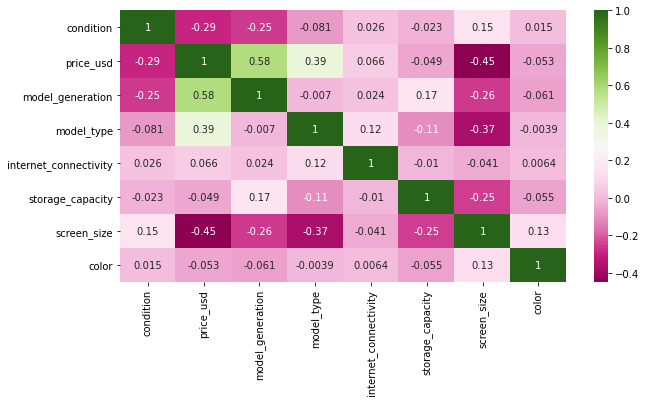

In [84]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(10,5))
corr = df4.corr()
sns.heatmap(corr,annot=True,cmap="PiYG")

In [85]:
target = 'price_usd'
col = ['condition',
       'model_generation','model_type','internet_connectivity',
       'storage_capacity', 'screen_size', 'color']

In [86]:
# Define a random state 

state = np.random.RandomState(42)
X = df4[col]
Y = df4[target]

X_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))
# Print the shapes of X & Y
print(X.shape)
print(Y.shape)

(1322, 7)
(1322,)


In [87]:
import sklearn
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=10)

In [88]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

regr = LinearRegression()
# fit the model with data
regr.fit(X_train,y_train)

LinearRegression()

In [89]:
y_predict = regr.predict(X_test)
print('Training data r-squared:', regr.score(X_train, y_train))
print('Test data r-squared:', regr.score(X_test, y_test))

print('Intercept', regr.intercept_)
pd.DataFrame(data=regr.coef_, index=X_train.columns, columns=['coef'])
print("Mean Squared Error:", mean_squared_error(y_test,y_predict))

Training data r-squared: 0.5568669568143269
Test data r-squared: 0.5287228864011086
Intercept 209.58635655891644
Mean Squared Error: 46496.26351494778


In [90]:
import statsmodels.api as sm
x_incl_const = sm.add_constant(X_train)

model = sm.OLS(y_train, x_incl_const)
results = model.fit()

df = pd.DataFrame({'coef': results.params, 'p-value': round(results.pvalues, 3)})

df[df['p-value'] < 0.05].count()

coef       6
p-value    6
dtype: int64

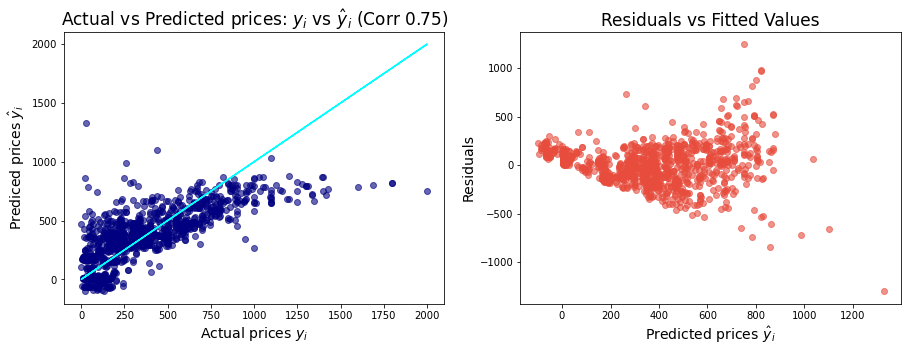

In [91]:
#Graph of Actual vs. Predicted Prices
plt.figure(figsize=[15, 5])
plt.subplot(1,2,1)

corr = round(y_train.corr(results.fittedvalues), 2)
plt.scatter(x=y_train, y=results.fittedvalues, c='navy', alpha=0.6)
plt.plot(y_train, y_train, color='cyan')

plt.xlabel('Actual prices $y _i$', fontsize=14)
plt.ylabel('Prediced prices $\hat y _i$', fontsize=14)
plt.title(f'Actual vs Predicted prices: $y _i$ vs $\hat y_i$ (Corr {corr})', fontsize=17)

# Residuals vs Predicted values
plt.subplot(1,2,2)
plt.scatter(x=results.fittedvalues, y=results.resid, c='#e74c3c', alpha=0.6)

plt.xlabel('Predicted prices $\hat y _i$', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.title('Residuals vs Fitted Values', fontsize=17)
plt.show()

In [92]:
from sklearn.tree import DecisionTreeRegressor
# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=4)

regr_1.fit(X_train, y_train)
y_predict = regr_1.predict(X_test)

print('Training data r-squared:', regr_1.score(X_train, y_train))
print('Test data r-squared:', regr_1.score(X_test, y_test))
print("Mean Squared Error:", mean_squared_error(y_test,y_predict))

Training data r-squared: 0.7311849915080425
Test data r-squared: 0.6991268076214127
Mean Squared Error: 29684.189691683096


In [93]:
from sklearn.tree import DecisionTreeRegressor
# Fit regression model
regr_1 = DecisionTreeRegressor()

regr_1.fit(X_train, y_train)
y_predict = regr_1.predict(X_test)

print('Training data r-squared:', regr_1.score(X_train, y_train))
print('Test data r-squared:', regr_1.score(X_test, y_test))
print("Mean Squared Error:", mean_squared_error(y_test,y_predict))

Training data r-squared: 0.9395029697179835
Test data r-squared: 0.7332449674938883
Mean Squared Error: 26318.08744249575


In [94]:
from sklearn.ensemble import RandomForestRegressor
regr_rf = RandomForestRegressor()

regr_rf.fit(X_train, y_train)
y_predict = regr_rf.predict(X_test)

print('Training data r-squared:', regr_rf.score(X_train, y_train))
print('Test data r-squared:', regr_rf.score(X_test, y_test))
print("Mean Squared Error:", mean_squared_error(y_test,y_predict))

Training data r-squared: 0.925128899883451
Test data r-squared: 0.7735867252374158
Mean Squared Error: 22337.964188949227


In [95]:
from sklearn.ensemble import GradientBoostingRegressor
regr_gb = RandomForestRegressor()

regr_gb.fit(X_train, y_train)
y_predict = regr_gb.predict(X_test)

print('Training data r-squared:', regr_gb.score(X_train, y_train))
print('Test data r-squared:', regr_gb.score(X_test, y_test))
print("Mean Squared Error:", mean_squared_error(y_test,y_predict))

Training data r-squared: 0.9258483669197793
Test data r-squared: 0.7693085153934638
Mean Squared Error: 22760.052948485165


In [96]:
print(labels)

{'condition': {'New': 0, 'Not working': 1, 'Open box': 2, 'Refurbished': 3, 'Used': 4}, 'model_type': {'air': 0, 'mini': 1, 'pro': 2}, 'internet_connectivity': {'Wi-Fi': 0, 'Wi-Fi + 3G': 1, 'Wi-Fi + 4G': 2, 'Wi-Fi + 5G': 3, 'Wi-Fi + Cellular': 4}, 'storage_capacity': {'1 TB': 0, '128 GB': 1, '16 GB': 2, '16Gb (8), 32': 3, '2 TB': 4, '256 GB': 5, '32 GB': 6, '512 GB': 7, '64 GB': 8}, 'screen_size': {'10.2': 0, '12.9': 1, '7.9': 2, '9.7': 3}, 'color': {'black': 0, 'blue': 1, 'gold': 2, 'gray': 3, 'green': 4, 'gunmetalgray': 5, 'multicolor': 6, 'nan': 7, 'pink': 8, 'purple': 9, 'rosegold': 10, 'silver': 11, 'skyblue': 12, 'spacegray': 13, 'spacegrey': 14, 'white': 15, 'white/silver': 16}}


In [97]:
from joblib import dump, load
dump(regr_gb,"ipadprice.joblib")

['ipadprice.joblib']

In [98]:
X_test.head()

,condition,model_generation,model_type,internet_connectivity,storage_capacity,screen_size,color
2979,4,4.0,0,2,8,0,1
1727,4,5.0,2,0,1,1,3
2570,4,1.0,0,2,2,3,11
2805,4,1.0,2,0,5,0,3
525,4,1.0,2,2,8,0,11


In [99]:
ipadpricepredictor = load('ipadprice.joblib')

ipadpricepredictor.predict(np.array([[4,4,0,2,8,0,1]]))

array([454.18571712])

In [101]:
X_test.model_generation.describe()

count    265.000000
mean     2.471698  
std      1.609675  
min      1.000000  
25%      1.000000  
50%      2.000000  
75%      4.000000  
max      7.000000  
Name: model_generation, dtype: float64